In [1]:
import matplotlib.pyplot as plt
import tqdm

In [29]:
with open("output.txt","r") as fin:
    lines = fin.readlines()

util_pos = 0
idle_pos = 1
colis_pos = 2
util_list = []
idle_list = []
collision_list = []
for i in range(496):
    util = 0
    idle = 0
    collis = 0
    for j in range(100):
        util += float(lines[util_pos].split("Channel utilization (in percentage) ")[1].strip())
        idle += float(lines[idle_pos].split("Channel idle fraction (in percentage) ")[1].strip())
        collis += int(lines[colis_pos].split("Total number of collisions ")[1].strip())
        util_pos += 6
        idle_pos += 6
        colis_pos += 6
    util_list.append(util / 100)
    idle_list.append(idle / 100)
    collision_list.append(collis / 100)





In [2]:
import random
import datetime
import numpy as np
class node_t:
    def __init__(self):
        self.id = 0
        self.collision_count = 0
        self.backoff = 0
        self.accum_collision_count = 0
        self.accum_transmission_count = 0

def csma(N, L, R, M, T):
    channel_idle_count = 0
    channel_collision_count = 0
    channel_occpy_count = 0
    node_list = []
    R_list = []
    R_list.append(R)
    for i in range(M):
        R_list.append(R * 2**(i+1))
    

    random.seed(datetime.datetime.now())
    for i in range(N):
        n = node_t()
        n.id = i
        n.collision_count = 0
        n.backoff = random.randint(0,R)
        n.accum_transmission_count = 0
        n.accum_collision_count = 0
        node_list.append(n)
    
    
    t = 0
    while(t < T):
        ##check back off value
        ready_nodes = []
        for item in node_list:
            if (item.backoff == 0):
                ready_nodes.append(item)
        

        ##No packets ready
        if (len(ready_nodes) == 0):
            for i in range(N):
                node_list[i].backoff -= 1
            channel_idle_count += 1
            t += 1
        
        if (len(ready_nodes) == 1):
            node_id = ready_nodes[0].id
            node_list[node_id].backoff = random.randint(0,R-1)
            node_list[node_id].collision_count = 0
            send_time = L
            if ((T - t) < send_time):
                send_time = T-t
            t += send_time
            channel_occpy_count += send_time
            if (send_time == L):
                node_list[node_id].accum_transmission_count += 1

        if (len(ready_nodes) > 1):
            channel_collision_count += 1
            for item in ready_nodes:
                node_id = item.id
                node_list[node_id].collision_count += 1
                node_list[node_id].accum_collision_count += 1
                node_list[node_id].backoff = random.randint(0, R_list[node_list[node_id].collision_count % (M+1)]-1)
            
            t+=1

    # print("Channel utilization (in percentage)",channel_occpy_count * 1.0 / T)
    # print("Channel idle fraction (in percentage)",channel_idle_count * 1.0 / T)
    # print("Total number of collisions",channel_collision_count)
    # print("Variance in number of successful transmissions (across all nodes)",np.var([item.accum_transmission_count for item in node_list]))
    # print("Variance in number of collisions",np.var([item.accum_collision_count for item in node_list]))
    return channel_occpy_count * 1.0 / T, channel_idle_count * 1.0 / T, channel_collision_count, np.var([item.accum_transmission_count for item in node_list]), np.var([item.accum_collision_count for item in node_list])
    

In [3]:
csma(500,20,8,6,50000)

(0.6939, 0.1515, 7730, 5.008975999999999, 86.22983599999999)

In [4]:
import tqdm
import torch
N_list = range(5,501,1)
L = 20
R = 8
M = 6
T = 50000
utilization_list = []
idle_list = []
collision_list = []
for N in tqdm.tqdm_notebook(N_list):
    local_utilization_list = []
    local_idle_list = []
    local_collision_list = []
    for i in range(100):
        util, idle, collision, _, _ =  csma(N,L,R,M,T)
        local_utilization_list.append(util)
        local_idle_list.append(idle)
        local_collision_list.append(collision)
    utilization_list.append(sum(local_utilization_list)/100)
    idle_list.append(sum(local_idle_list)/100)
    collision_list.append(sum(local_collision_list)/100)

torch.save({"utilization":utilization_list, "idle":idle_list, "collision":collision_list}, "abc_results.pkl")

/home/nesa320/anaconda2/envs/contras_sum/lib/python3.6/site-packages/ipykernel_launcher.py:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # This is added back by InteractiveShellApp.init_path()


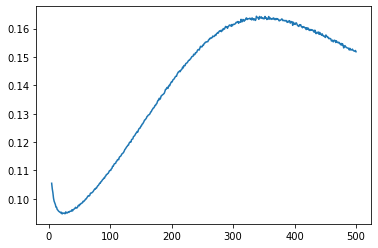

In [6]:
plt.plot(N_list, idle_list)

In [1]:
from ctypes import *
csma = cdll.LoadLibrary("./libcsma.so")

In [3]:
# csma.csma_api(5,20,8,6,10)
csma.hello_word()

-191448224

In [4]:
import torch
abc_results = torch.load("results/abc_results.pkl")
N_list = range(5,501)
util_list = abc_results["utilization"]
idle_list = abc_results["idle"]
collision_list = abc_results["collision"]

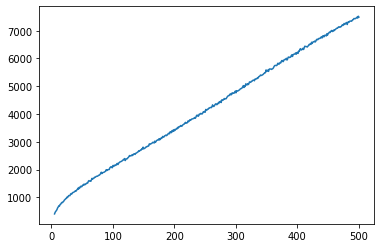

In [8]:
plt.plot(N_list, collision_list)